In [1]:
import numpy as np
from  sklearn.datasets import load_svmlight_file as a
from scipy.sparse import coo_matrix, vstack
from sklearn import svm 
from sklearn import cross_validation 
import matplotlib.pyplot as plt
from sklearn.decomposition import RandomizedPCA
from sklearn import preprocessing
from matplotlib.mlab import PCA as mlabPCA
from pylab import show,title,plot
from sklearn.lda import LDA
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
#Load all Datasets
Data1=a("C:\Users\Sanju\Desktop\datasets\TV_News_Channel_Commercial_Detection_Dataset\BBC.txt",n_features=4125,dtype=np.float64,multilabel=False,zero_based='auto',query_id=False)
Data2=a("C:\Users\Sanju\Desktop\datasets\TV_News_Channel_Commercial_Detection_Dataset\CNN.txt",n_features=4125,dtype=np.float64,multilabel=False,zero_based='auto',query_id=False)
Data3=a("C:\Users\Sanju\Desktop\datasets\TV_News_Channel_Commercial_Detection_Dataset\CNNIBN.txt",n_features=4125,dtype=np.float64,multilabel=False,zero_based='auto',query_id=False)
Data4=a("C:\Users\Sanju\Desktop\datasets\TV_News_Channel_Commercial_Detection_Dataset\NDTV.txt",n_features=4125,dtype=np.float64,multilabel=False,zero_based='auto',query_id=False)
Data5=a("C:\Users\Sanju\Desktop\datasets\TV_News_Channel_Commercial_Detection_Dataset\TIMESNOW.txt",n_features=4125,dtype=np.float64,multilabel=False,zero_based='auto',query_id=False)

In [3]:
#x is an sparse matrix(n_samples.n_features), (y is a list of n_samples)
data1x,data1y=Data1
data2x,data2y=Data2
data3x,data3y=Data3
data4x,data4y=Data4
data5x,data5y=Data5

x1=coo_matrix(data1x)
x2=coo_matrix(data2x)
x3=coo_matrix(data3x)
x4=coo_matrix(data4x)
x5=coo_matrix(data5x)

data_X=vstack([x1,x3,x5]).toarray()

print data_X.shape

Data_Y=np.concatenate((data1y,data3y,data5y), axis=1)
print Data_Y.shape    

(90089L, 4125L)
(90089L,)


In [4]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    data_X, Data_Y, test_size=0.25,random_state=50)

In [5]:
#Copies of train and Test Dataset 

#SVM
SVM_Train_X=X_train
SVM_test_X=X_test
#RF
RF_Train_X=X_train
RF_test_X=X_test



In [6]:
print SVM_Train_X.shape
SVM_test_X.shape

(67566L, 4125L)


(22523L, 4125L)

In [ ]:
#SVM Classification with 4125 features
slf=svm.SVC(kernel='linear')
slf.fit(SVM_Train_X,y_train)

In [ ]:
SVM_SCORE=slf.score(SVM_test_X,y_test)*100

In [7]:
#Random Forest Classifier
Rlf = RandomForestClassifier(n_estimators=1000,n_jobs=2)
Rlf.fit(RF_Train_X,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [9]:
RFC_SCORE=Rlf.score(RF_test_X,y_test)*100
print RFC_SCORE

93.1003862718


In [10]:
#Normalise Each Feature
Train_X=preprocessing.normalize(X_train,norm='l2')
Test_X=preprocessing.normalize(X_test,norm='l2')

In [13]:
#Copies
SVM_test_X_lda=Test_X
SVM_test_X_pca=Test_X
SVM_Train_X_lda=Train_X
SVM_Train_X_pca=Train_X

RF_test_X_lda=Test_X
RF_test_X_pca=Test_X
RF_Train_X_lda=Train_X
RF_Train_X_pca=Train_X

In [14]:
print Train_X.shape

(67566L, 4125L)


In [15]:
#PCA implementataion 
pca = RandomizedPCA(n_components=2).fit(SVM_Train_X_pca)
#SVM
SVM_Train_X_pca=pca.transform(SVM_Train_X_pca)
SVM_test_X_pca=pca.transform(SVM_test_X_pca)

In [16]:
#for random forest 
pca = RandomizedPCA(n_components=2).fit(RF_Train_X_pca)
#RANd
RF_Train_X_pca=pca.transform(RF_Train_X_pca)
RF_test_X_pca=pca.transform(RF_test_X_pca)

In [17]:
#SVM Classification with 2 best features PCA
slf=svm.SVC(kernel='linear')
slf.fit(SVM_Train_X_pca,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [ ]:
#SVM Classification with 2 best features Lda
slf_1=svm.SVC(kernel='linear')
slf_1.fit(SVM_Train_X_lda,y_train)

In [18]:
SVM_SCORE_pca=slf.score(SVM_test_X_pca,y_test)*100
print SVM_SCORE_pca
#SVM_SCORE_lda=slf_1.score(SVM_test_X_lda,y_test)*100

70.8076188785


In [19]:
#Random _classifier with 2 features
Rlf = RandomForestClassifier(n_estimators=1000,n_jobs=2)
Rlf.fit(RF_Train_X_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
#
Rlf_1 = RandomForestClassifier(n_estimators=1000,n_jobs=2)
Rlf_1.fit(RF_Train_X_lda,y_train)

In [20]:
RFC_SCORE_pca=Rlf.score(RF_test_X_pca,y_test)*100
#RFC_SCORE_lda=Rlf_1.score(RF_test_X_lda,y_test)*100

In [21]:
print "SVM"
print SVM_SCORE_pca
#print SVM_SCORE_lda
#print SVM_SCORE


print "Random Forest"
#print RFC_SCORE
print RFC_SCORE_pca
#print RFC_SCORE_lda





SVM
70.8076188785
Random Forest
76.0911068685


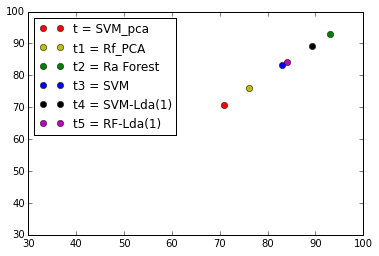

In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# evenly sampled time at 200ms intervals
t =70.8
t1=76.0911
t2=93.11
t3=83.11
t4=89.3
t5=84.11


plt.xlim(30, 100)
plt.ylim(30, 100)
plt.plot(t,t,'ro')
plt.plot(t1,t1,'yo')
plt.plot(t2,t2,'go')
plt.plot(t3,t3,'bo')
plt.plot(t4,t4,'ko')
plt.plot(t5,t5,'mo')
plt.legend(['t = SVM_pca', 't1 = Rf_PCA', 't2 = Ra Forest', 't3 = SVM','t4 = SVM-Lda(1)','t5 = RF-Lda(1)'], loc='upper left')

plt.show()